In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("trainBase/model_99923/convergence.csv")

# Extracting relevant columns
epochs = data['epoch']
training_loss = data['training_loss']
validation_loss = data['validation_loss']
training_accuracy = data['training_accuracy']
validation_accuracy = data['validation_accuracy']
training_precision_recall_auc = data['training_precision_recall_auc']
validation_precision_recall_auc = data['validation_precision_recall_auc']

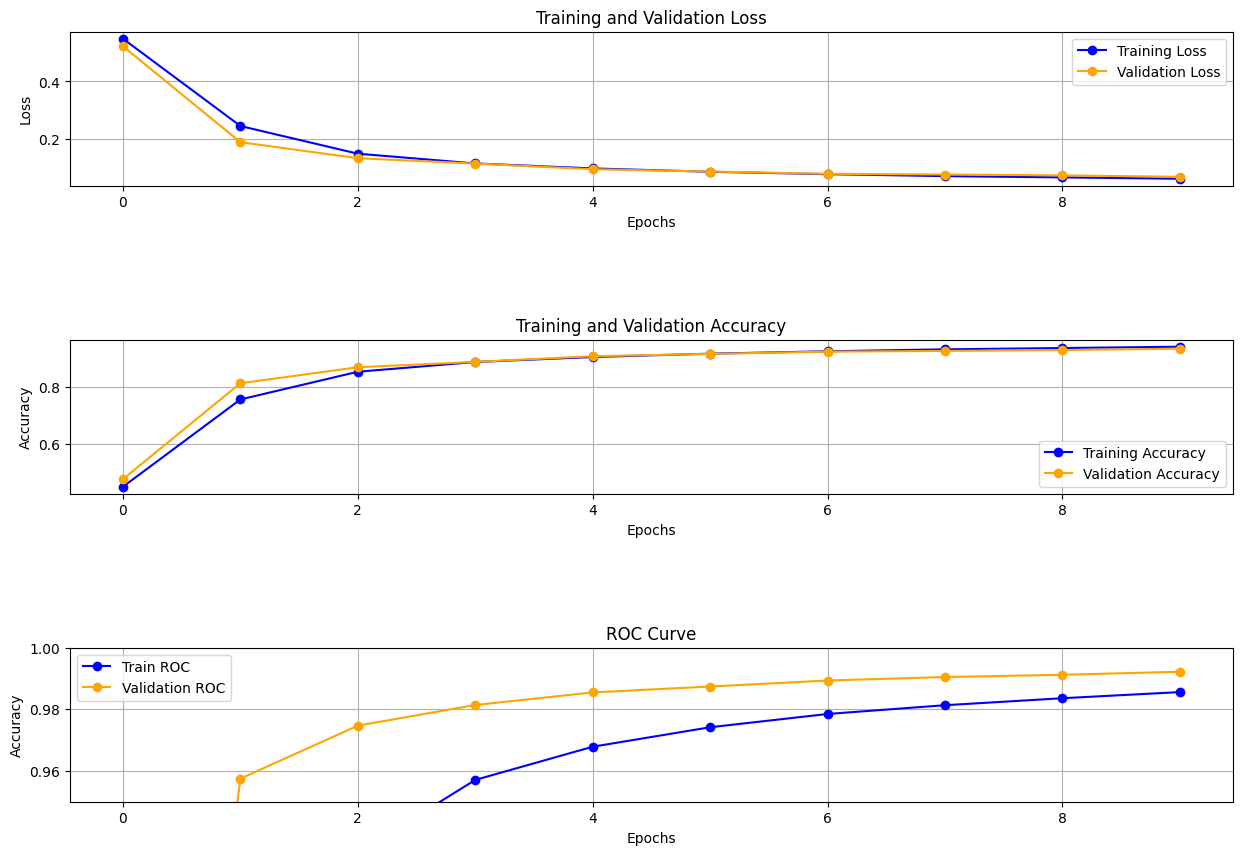

In [3]:
# Plotting
epoch_count = 10

plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.plot(epochs[:epoch_count], training_loss[:epoch_count], label='Training Loss', color='blue',marker = 'o')
plt.plot(epochs[:epoch_count], validation_loss[:epoch_count], label='Validation Loss', color='orange',marker = 'o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(epochs[:epoch_count], training_accuracy[:epoch_count], label='Training Accuracy', color='blue',marker = 'o')
plt.plot(epochs[:epoch_count], validation_accuracy[:epoch_count], label='Validation Accuracy', color='orange',marker = 'o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


plt.subplot(3, 1, 3)
plt.plot(epochs[:epoch_count], training_precision_recall_auc[:epoch_count], label='Train ROC', color='blue',marker = 'o')
plt.plot(epochs[:epoch_count], validation_precision_recall_auc[:epoch_count], label='Validation ROC', color='orange',marker = 'o')
plt.ylim([0.95, 1.0])
plt.title('ROC Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplots_adjust(hspace=1.0)

plt.show()

In [4]:
%run testBase.py

2024-03-18 10:47:44 INFO     Loading model...
2024-03-18 10:47:44 INFO     Loading test data in test.h5
2024-03-18 10:47:52 INFO     Putting test data into data loader...
2024-03-18 10:47:52 INFO     Applying model to 56695 examples...


KeyboardInterrupt: 

## Plotting the Pearson Coefficient curve between two models

In [7]:
import torch
import matplotlib.pyplot as plt
import numpy as np

model_path_23823 = '/uufs/chpc.utah.edu/common/home/koper-group4/shiva/machineLearning/eqBlast/trainBase/model_23823/model_3.pt'
model_path_72375 = '/uufs/chpc.utah.edu/common/home/koper-group4/shiva/machineLearning/eqBlast/trainBase/model_72375/model_4.pt'
model_path_99923 = '/uufs/chpc.utah.edu/common/home/koper-group4/shiva/machineLearning/eqBlast/trainBase/model_99923/model_4.pt'
# Load the parameters from the first seed
model_23823 = torch.load(model_path_23823)
params_23823 = []
for param in model_23823.parameters():
    params_23823.extend(param.data.cpu().numpy().flatten())

# Load the parameters from the second seed
model_path_72375 = torch.load(model_path_72375)
params_72375 = []
for param in model_path_72375.parameters():
    params_72375.extend(param.data.cpu().numpy().flatten())

# Load the parameters from the third seed
model_path_99923 = torch.load(model_path_99923)
params_99923 = []
for param in model_path_99923.parameters():
    params_99923.extend(param.data.cpu().numpy().flatten())


/uufs/chpc.utah.edu/common/home/u1460836/anaconda3/lib/python3.11/site-packages/torch/serialization.py:1007: UserWarning: 'torch.load' received a zip file that looks like a TorchScript archive dispatching to 'torch.jit.load' (call 'torch.jit.load' directly to silence this warning)
  warnings.warn("'torch.load' received a zip file that looks like a TorchScript archive"
/uufs/chpc.utah.edu/common/home/u1460836/anaconda3/lib/python3.11/site-packages/torch/serialization.py:1007: UserWarning: 'torch.load' received a zip file that looks like a TorchScript archive dispatching to 'torch.jit.load' (call 'torch.jit.load' directly to silence this warning)
  warnings.warn("'torch.load' received a zip file that looks like a TorchScript archive"


In [7]:
print(np.corrcoef(params_23823, params_72375))

[[1.         0.46552026]
 [0.46552026 1.        ]]


In [8]:
print(np.corrcoef(params_99923, params_72375))

[[1.         0.46571163]
 [0.46571163 1.        ]]


In [9]:
print(np.corrcoef(params_23823, params_99923))

[[1.         0.46458736]
 [0.46458736 1.        ]]


# Correlation of trained models using state dict

In [8]:
import torch
import matplotlib.pyplot as plt
import numpy as np

model_path_23823 = '/uufs/chpc.utah.edu/common/home/koper-group4/shiva/machineLearning/eqBlast/trainBase/model_23823/model_3.pt'
model_path_99923 = '/uufs/chpc.utah.edu/common/home/koper-group4/shiva/machineLearning/eqBlast/trainBase/model_99923/model_4.pt'
# Load the parameters from the first seed
model_23823 = torch.load(model_path_23823)
model_99923 = torch.load(model_path_99923)

state_dict_model1_trained = model_23823.state_dict()
state_dict_model2_trained = model_99923.state_dict()

correlations = []

required_params = ['conv2d_1.weight', 'conv2d_2.weight','conv2d_3.weight','conv2d_4.weight','linear_1.weight','linear_2.weight']

for name, param_model1 in state_dict_model1_trained.items():
    if name in state_dict_model2_trained and name in required_params:
        param_model2 = state_dict_model2_trained[name]
        # Convert the parameters to numpy arrays
        param_model1_np = param_model1.cpu().numpy().flatten()
        param_model2_np = param_model2.cpu().numpy().flatten()
        # Compute the correlation coefficient between the parameters
        correlation = np.corrcoef(param_model1_np, param_model2_np)[0, 1]
        correlations.append(correlation)

# Calculate the average correlation coefficient
average_correlation = np.mean(correlations)

print("Average correlation coefficient:", average_correlation)


Average correlation coefficient: 0.011662480523403738


/uufs/chpc.utah.edu/common/home/u1460836/anaconda3/lib/python3.11/site-packages/torch/serialization.py:1007: UserWarning: 'torch.load' received a zip file that looks like a TorchScript archive dispatching to 'torch.jit.load' (call 'torch.jit.load' directly to silence this warning)
  warnings.warn("'torch.load' received a zip file that looks like a TorchScript archive"


# Plotting correlation between initialised weights (Models are not trained)

In [6]:
import torch
import matplotlib.pyplot as plt
import numpy as np

model_path_23823 = '/uufs/chpc.utah.edu/common/home/koper-group4/shiva/machineLearning/eqBlast/trainBase/model_23823/model_initial.pt'
model_path_99923 = '/uufs/chpc.utah.edu/common/home/koper-group4/shiva/machineLearning/eqBlast/trainBase/model_99923/model_initial.pt'
# Load the parameters from the first seed
state_dict_model1 = torch.load(model_path_23823)
state_dict_model2 = torch.load(model_path_99923)

correlations = []

required_params = ['conv2d_1.weight', 'conv2d_2.weight','conv2d_3.weight','conv2d_4.weight','linear_1.weight','linear_2.weight']

for name, param_model1 in state_dict_model1.items():
    if name in state_dict_model2 and name in required_params:
        param_model2 = state_dict_model2[name]
        # Convert the parameters to numpy arrays
        param_model1_np = param_model1.cpu().numpy().flatten()
        param_model2_np = param_model2.cpu().numpy().flatten()
        # Compute the correlation coefficient between the parameters
        correlation = np.corrcoef(param_model1_np, param_model2_np)[0, 1]
        correlations.append(correlation)

# Calculate the average correlation coefficient
average_correlation = np.mean(correlations)

print("Average correlation coefficient:", average_correlation)

Average correlation coefficient: 0.010989000837097524


In [ ]:
print(np.corrcoef(params_23823, params_99923))


In [6]:

import h5py
f = h5py.File("train.h5",'r')
X_train = f['X'][:10]
y_train = f['y'][:10]

print(X_train.shape)
print(X_train)

print(y_train.shape)
print(y_train)

(10, 3, 72, 51)
[[[[2.20125262e-02 2.83211116e-02 4.92082536e-02 ... 4.63237666e-04
    1.28075713e-03 1.53405068e-04]
   [2.93515995e-02 2.23091859e-02 3.95317152e-02 ... 1.78524537e-03
    1.37012685e-03 1.33181305e-03]
   [1.61180575e-03 2.53713923e-03 3.54314186e-02 ... 1.46578311e-03
    1.65181281e-03 7.23836478e-04]
   ...
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]]

  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   ...
   [0.00000000e+00 0.00000000e+00 0.00000

In [11]:
from swag.models.cnn import CNN, CNN1
import torch
model = CNN1()
model_path_1 = '/uufs/chpc.utah.edu/common/home/koper-group4/shiva/machineLearning/eqBlast/trainBaseSWAG/swag-300.pt'
model_path_2 = '/uufs/chpc.utah.edu/common/home/koper-group4/shiva/machineLearning/eqBlast/trainBaseSWAG/checkpoint-300.pt'
# model.load_from_jit(model_path)
state_dict_model1 = torch.load(model_path_1)
state_dict_model2 = torch.load(model_path_2)


In [20]:
state_dict_model1.state_dict()

AttributeError: 'dict' object has no attribute 'state_dict'

In [18]:
state_dict_model2.items()

dict_items([('epoch', 300), ('state_dict', OrderedDict([('conv2d_1.weight', tensor([[[[-2.3234e-42, -2.3234e-42, -2.3234e-42],
          [-2.3234e-42, -2.3234e-42, -2.3234e-42],
          [-2.3234e-42, -2.3234e-42, -2.3234e-42]],

         [[-2.3234e-42, -2.3234e-42, -2.3234e-42],
          [-2.3234e-42, -2.3234e-42, -2.3234e-42],
          [-2.3234e-42, -2.3234e-42, -2.3234e-42]],

         [[-2.3234e-42, -2.3234e-42, -2.3234e-42],
          [-2.3234e-42, -2.3234e-42, -2.3234e-42],
          [-2.3234e-42, -2.3234e-42, -2.3234e-42]]],


        [[[-2.3234e-42, -2.3234e-42,  2.3234e-42],
          [-2.3234e-42, -2.3234e-42, -2.3234e-42],
          [-2.3234e-42, -2.3234e-42, -2.3234e-42]],

         [[ 2.3234e-42,  2.3234e-42,  2.3234e-42],
          [ 2.3234e-42,  2.3234e-42, -2.3234e-42],
          [ 2.3234e-42, -2.3234e-42, -2.3234e-42]],

         [[-2.3234e-42, -2.3234e-42,  2.3234e-42],
          [-2.3234e-42, -2.3234e-42,  2.3234e-42],
          [-2.3234e-42, -2.3234e-42, -2.3234e

# Visualising the probabilities of SWAG output

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import CalibrationDisplay

# Load the probabilities from the binary file
cnn_200_r20 = np.load('cnn_inference/cnn_200_r20.npz')

cnn_200_r40 = np.load('cnn_inference/cnn_200_r40.npz')

cnn_200_r100 = np.load('cnn_inference/cnn_200_r100.npz')

# Use the probabilities as needed
probabilities_cnn_20 = cnn_200_r20['probabilites'].flatten()
targets_cnn_20 = cnn_200_r20['targets'].flatten()
prediction_matrix_cnn_20 = cnn_200_r20['predictions']


probabilities_cnn_40 = cnn_200_r40['probabilites'].flatten()
targets_cnn_40 = cnn_200_r40['targets'].flatten()
prediction_matrix_cnn_40 = cnn_200_r40['predictions']

probabilities_cnn_100 = cnn_200_r100['probabilites'].flatten()
targets_cnn_100= cnn_200_r100['targets'].flatten()
prediction_matrix_cnn_100 = cnn_200_r100['predictions']



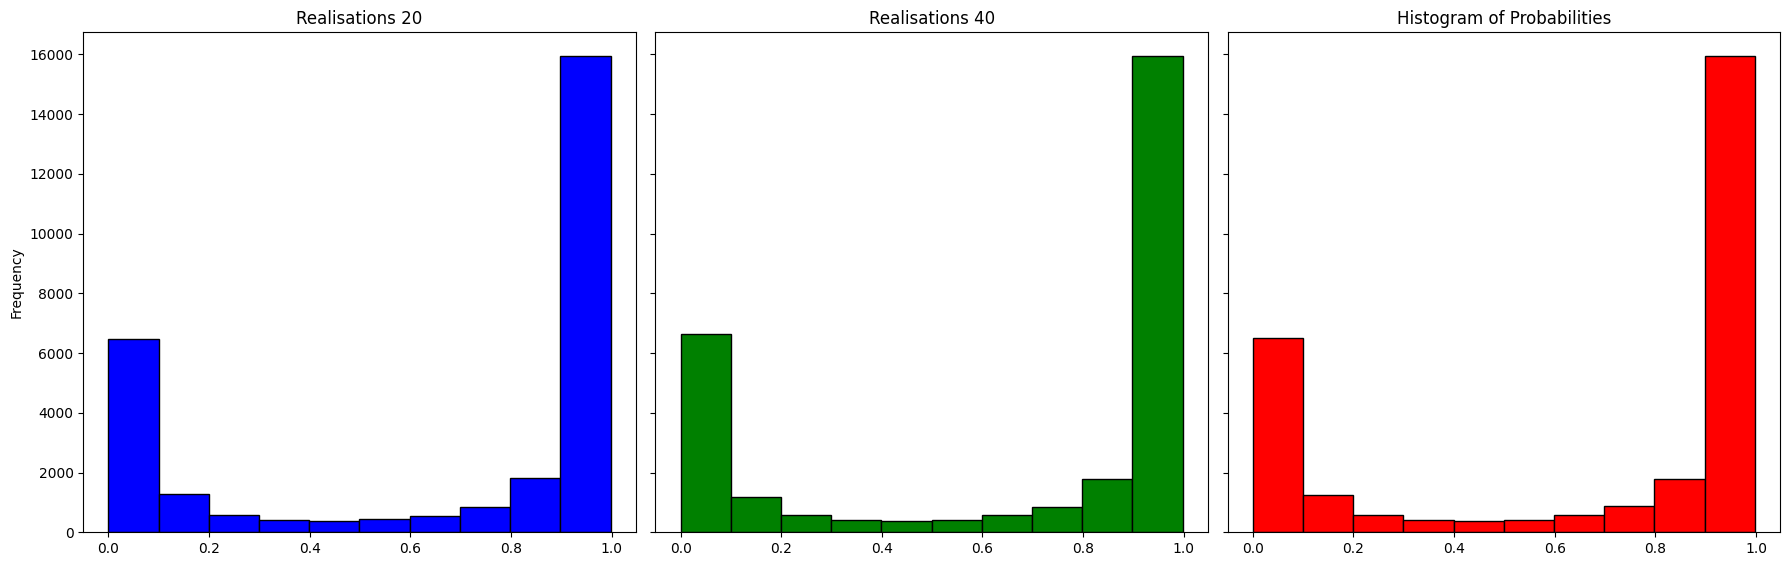

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for epoch 20
axs[0].hist(probabilities_cnn_20, bins=10, edgecolor='black', align='mid', color='blue')
axs[0].set_title('Realisations 20')
axs[0].set_ylabel('Frequency')


# Plot for epoch 40
axs[1].hist(probabilities_cnn_40, bins=10, edgecolor='black', align='mid', color='green')
axs[1].set_title('Realisations 40')


# Plot for epoch 100
axs[2].hist(probabilities_cnn_100, bins=10, edgecolor='black', align='mid', color='red')
axs[2].set_title('Realisations 100')

plt.title('Histogram of Probabilities')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

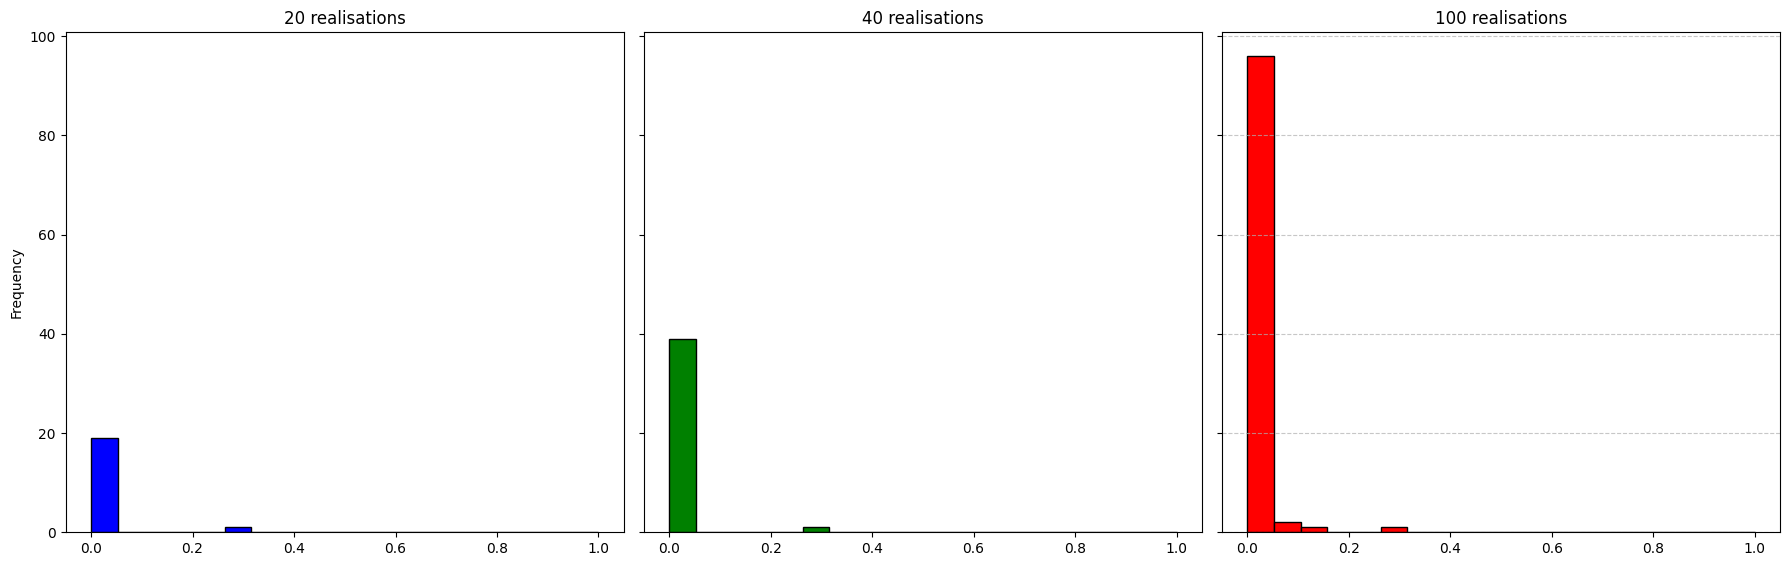

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

bin_size  = np.linspace(0,1,20)

# Plot for epoch 20
axs[0].hist(prediction_matrix_cnn_20[0], bins=bin_size, edgecolor='black', align='mid', color='blue')
axs[0].set_title('20 realisations')
axs[0].set_ylabel('Frequency')


# Plot for epoch 40
axs[1].hist(prediction_matrix_cnn_40[0], bins=bin_size, edgecolor='black', align='mid', color='green')
axs[1].set_title('40 realisations')


# Plot for epoch 100
axs[2].hist(prediction_matrix_cnn_100[0], bins=bin_size, edgecolor='black', align='mid', color='red')
axs[2].set_title('100 realisations')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
targets_cnn_20

array([0., 0., 0., ..., 0., 0., 0.])

/uufs/chpc.utah.edu/common/home/u1460836/anaconda3/lib/python3.11/site-packages/sklearn/calibration.py:1176: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "s-" (-> marker='s'). The keyword argument will take precedence.
  self.line_ = ax.plot(self.prob_pred, self.prob_true, "s-", **line_kwargs)[0]
/uufs/chpc.utah.edu/common/home/u1460836/anaconda3/lib/python3.11/site-packages/sklearn/calibration.py:1176: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "s-" (-> marker='s'). The keyword argument will take precedence.
  self.line_ = ax.plot(self.prob_pred, self.prob_true, "s-", **line_kwargs)[0]
/uufs/chpc.utah.edu/common/home/u1460836/anaconda3/lib/python3.11/site-packages/sklearn/calibration.py:1176: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "s-" (-> marker='s'). The keyword argument will take precedence.
  self.line_ = ax.plot(self.prob_pr

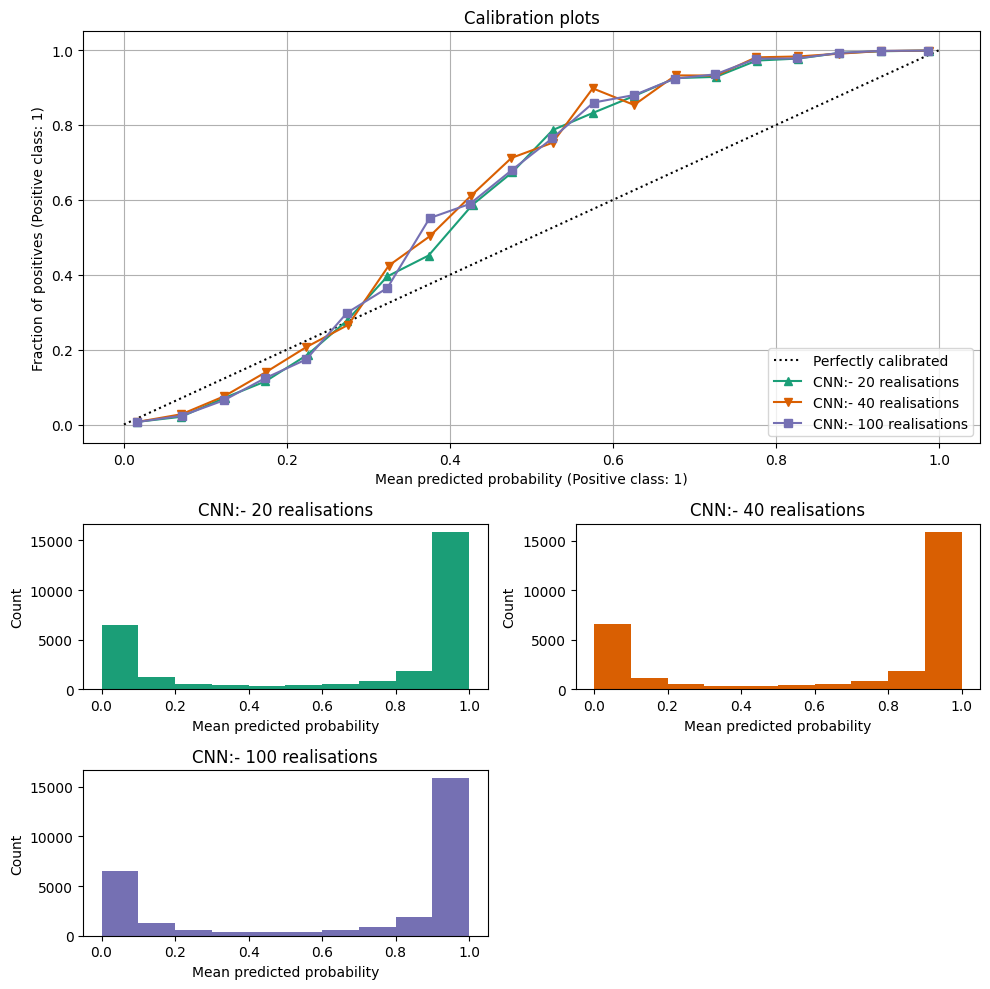

In [8]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
markers = ["^", "v", "s"]
clf_list = [
    (probabilities_cnn_20, "CNN:- 20 realisations"),
    (probabilities_cnn_40, "CNN:- 40 realisations"),
    (probabilities_cnn_100, "CNN:- 100 realisations")
]
for i, (clf, name) in enumerate(clf_list):
    display = CalibrationDisplay.from_predictions(
        targets_cnn_20,
        clf,
        n_bins=20,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
        marker=markers[i],
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

In [ ]:

y_test = cnn_200_r20['targets'].flatten()

disp = CalibrationDisplay.from_predictions(y_test, probabilities_flat_cnn_20)
plt.show()

In [ ]:
indices = np.arange(len(prediction_matrix_cnn_20[25]))
values_20 = prediction_matrix_cnn_20[25]
#plt.bar(indices, values_20, color='blue')
plt.hist(values_20, bins=np.linspace(0,1,20))

# Add title and labels
plt.title('Probability for 20 inferences for a record')
plt.xlabel('Index')
plt.ylabel('Probability')

# Optionally, add grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

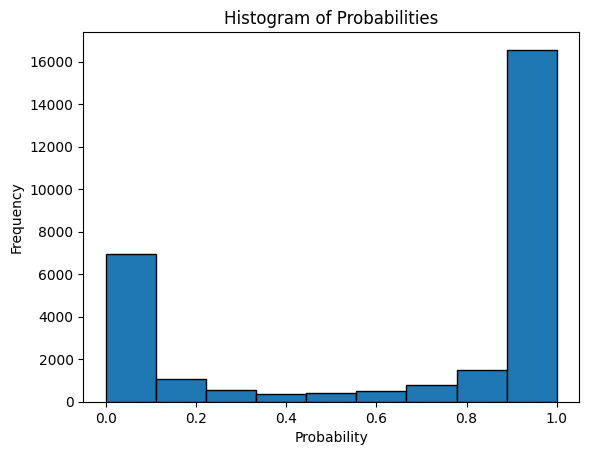

In [2]:


# Plot the histogram
plt.hist(probabilities_cnn_20, bins=np.linspace(0,1,10), edgecolor='black')
plt.title('Histogram of Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Use the probabilities as needed
prediction_matrix_cnn_20 = cnn_200_r20['predictions']
print(prediction_matrix_cnn_20[25])

[5.71780931e-03 2.88939825e-03 1.16663787e-03 3.97129636e-03
 1.17445569e-02 1.93800740e-02 1.65151618e-02 2.58822896e-04
 9.81487334e-02 7.75188819e-05 2.32282653e-03 4.43554018e-03
 3.68673094e-02 5.10195969e-03 1.14173638e-02 4.03051730e-03
 3.28248441e-02 1.45553108e-02 5.86471008e-03 1.24876469e-03]


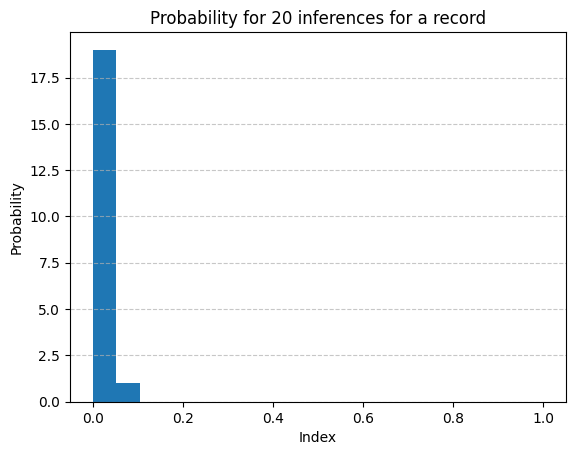

In [10]:
indices = np.arange(len(prediction_matrix_cnn_20[25]))
values_20 = prediction_matrix_cnn_20[25]
#plt.bar(indices, values_20, color='blue')
plt.hist(values_20, bins=np.linspace(0,1,20))

# Add title and labels
plt.title('Probability for 20 inferences for a record')
plt.xlabel('Index')
plt.ylabel('Probability')

# Optionally, add grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

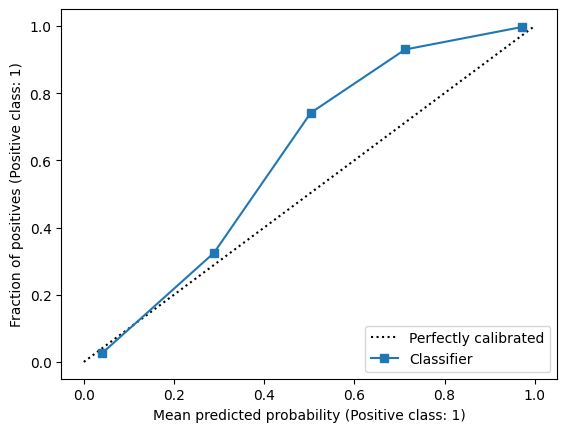

In [20]:
import matplotlib.pyplot as plt

from sklearn.calibration import CalibrationDisplay

y_test = cnn_200_r20['targets'].flatten()

disp = CalibrationDisplay.from_predictions(y_test, probabilities_flat_cnn_20)
plt.show()

In [ ]:
# Load the probabilities from the binary file
cnn_200_r40 = np.load('cnn_200_r40')

# Use the probabilities as needed
probabilities_cnn_40 = cnn_200_r40['probabilites']


# Load the probabilities from the binary file
cnn_200_r100 = np.load('cnn_200_r100')

# Use the probabilities as needed
probabilities_cnn_100 = cnn_200_r100['probabilites']

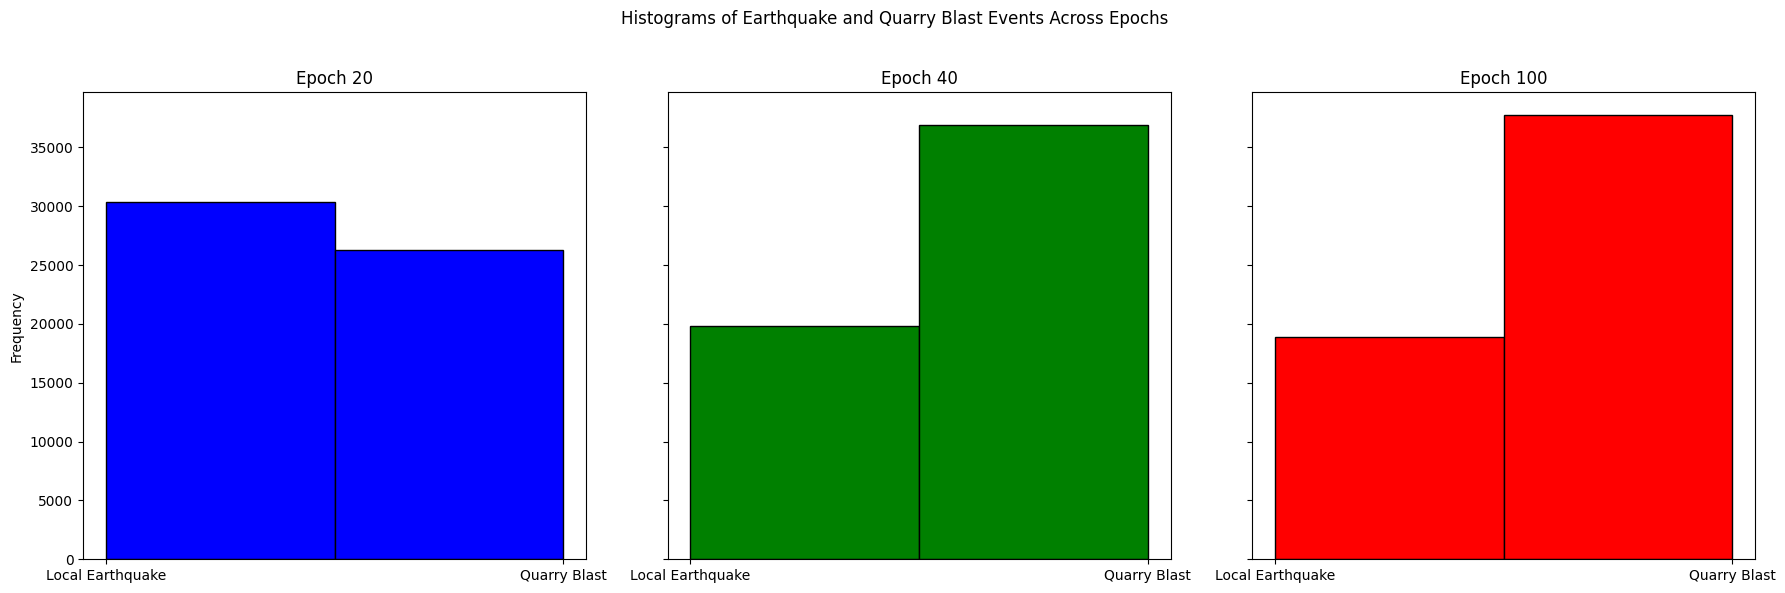

In [5]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for epoch 20
axs[0].hist(probabilities_cnn_20.flatten(), bins=10, edgecolor='black', align='mid', color='blue')
axs[0].set_title('Realisations 20')
axs[0].set_ylabel('Frequency')


# Plot for epoch 40
axs[1].hist(probabilities_cnn_40.flatten(), bins=10, edgecolor='black', align='mid', color='green')
axs[1].set_title('Realisations 40')


# Plot for epoch 100
axs[2].hist(probabilities_cnn_100.flatten(), bins=10, edgecolor='black', align='mid', color='red')
axs[2].set_title('Realisations 100')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

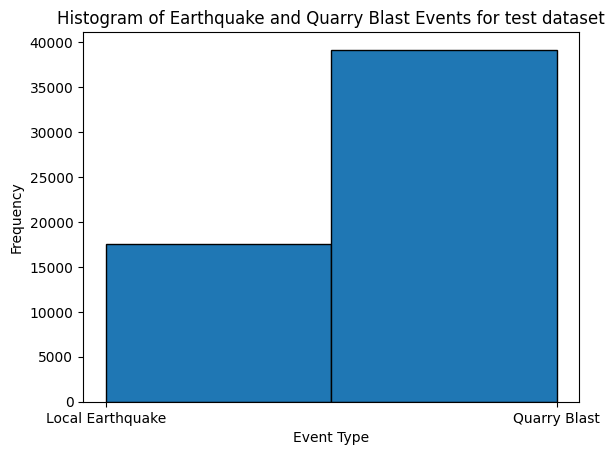

In [11]:
import matplotlib.pyplot as plt
plt.hist(targets, bins =2,edgecolor='black', align='mid')
plt.xticks([0, 1], ['Local Earthquake', 'Quarry Blast'])
plt.xlabel('Event Type')
plt.ylabel('Frequency')
plt.title('Histogram of Earthquake and Quarry Blast Events for test dataset')
plt.show()


In [1]:
import numpy as np

# Load the probabilities from the binary file
cnn_model_results = np.load('CNN1models/sgd_ens_preds.npz')

In [2]:
cnn_model_results

NpzFile 'CNN1models/sgd_ens_preds.npz' with keys: predictions, targets, training_acc_scores, validation_acc_scores, epoch_count

In [3]:
training_acc_scores = cnn_model_results['training_acc_scores']
validation_acc_scores = cnn_model_results['validation_acc_scores']
epoch_count = cnn_model_results['epoch_count']

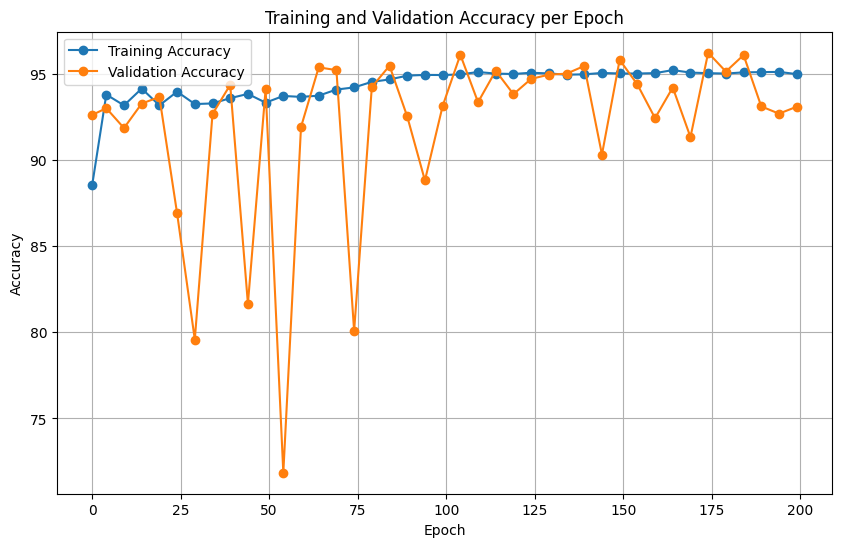

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(epoch_count, training_acc_scores, label='Training Accuracy', marker='o')
plt.plot(epoch_count, validation_acc_scores, label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
import torch

torch.manual_seed(10)
for i in range(3):
    torch.manual_seed(10)
    y = torch.rand(3)
    print(y)


tensor([0.4581, 0.4829, 0.3125])
tensor([0.4581, 0.4829, 0.3125])
tensor([0.4581, 0.4829, 0.3125])
